In [223]:
import requests
import bs4 as bs
import pandas as pd
import numpy as np
import warnings
import re
import datetime
import time
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division, absolute_import #make compatible with Python 2 and Python 3

In [182]:
#Scraping code for InvestFeed
record = pd.DataFrame()
for i in range(0,241):
    post=[]
    date=[]
    url = "https://www.investfeed.com/currency/BTC?page="+str(i+1)
    soup = bs.BeautifulSoup(requests.get(url).text, "html.parser")
    content = soup.find_all('div', attrs={'class': 'post-content'})
    date_time = soup.find_all('div',attrs={'class':'floated-right'})
    for x in range(len(content)):
        post.append(re.sub(r'\s+', ' ', content[x].text))
        date.append(re.sub(r'\s+',' ',date_time[x].text))
    if (i+1)%25 == 0:
        print('{} pages completed!'.format(i+1))
    t1 = pd.Series(date)
    t2 = pd.Series(post)
    temp_record = pd.concat([t1,t2],axis=1)
    record = pd.concat([record,temp_record]).reset_index(drop=True)

25 pages completed!
50 pages completed!
75 pages completed!
100 pages completed!
125 pages completed!
150 pages completed!
175 pages completed!
200 pages completed!
225 pages completed!


In [183]:
record.shape

(2404, 2)

In [191]:
record.head(25)

,Date,Post
0,2017-11-30,Happiness All Over Crypto World!! Best Year E...
1,2017-11-30,$BTC So far a standard correction with price ...
2,2017-11-30,Yo Yo Yo! $BTC
3,2017-11-30,#bit of #humor in the tape #bitcoinATM #miner...
4,2017-11-30,#bit of #humor in the tape #bitcoinATM #miner...
5,2017-11-30,#bit of #humor in the tape #bitcoinATM #miner...
6,2017-11-30,#bit of #humor in the tape #bitcoinATM #miner...
7,2017-11-30,#Coinbase #IRS #Crypto #Cryptocurrency #Bitco...
8,2017-11-30,Wall Street Journal first page today #bitcoin...
9,2017-11-30,John McAfee voit le Bitcoin à 1 million de $ ...


In [131]:
#record = record.drop(record[record.index > 2264].index) #Elements beyond this had random content. 2264 captures all posts.

In [187]:
record = record.rename(columns = {0:'Date',1:'Post'})

In [188]:
record['Date'] = pd.to_datetime(record['Date']).dt.date #Converting from str to datetime obj and retaining just the dates

In [192]:
record = record.iloc[23:].reset_index(drop=True) #Prices unavailable for Novmeber 30th

In [193]:
col_names = ['Date','Price']
btc = pd.read_csv('btc_price.csv',header=None,names=col_names)

In [194]:
print(btc.shape)
btc.head()

(365, 2)


,Date,Price
0,2016-11-30 00:00:00,742.696762
1,2016-12-01 00:00:00,752.246125
2,2016-12-02 00:00:00,772.437250
3,2016-12-03 00:00:00,764.339625
4,2016-12-04 00:00:00,764.816250


In [195]:
#Setting labels for the Bitcoin prices to perform Sentiment Analysis
label=[]
for i in range(1,btc.shape[0]):
    if (btc.iat[i,1]>btc.iat[i-1,1]):
        btc.loc[btc.index[i],'Sentiment']=1
    else:
        btc.loc[btc.index[i],'Sentiment']=0
btc.loc[btc.index[0],'Sentiment']=0 #To match indices with btc. This false value will anyway go away when we trim BTC to match record df.
btc['Sentiment'] = btc['Sentiment'].astype(int)

In [196]:
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

In [257]:
btc.tail()

,Date,Price,Sentiment
360,2017-11-25,8707.407267,1
361,2017-11-26,9284.143800,1
362,2017-11-27,9718.295050,1
363,2017-11-28,9952.508820,1
364,2017-11-29,9879.328333,0


In [297]:
temp = record.merge(btc, on='Date', how='inner')

In [298]:
sent = temp.drop('Price',1)

In [299]:
sent.head()

,Date,Post,Sentiment
0,2017-11-29,#bear or #Bulls ??? #bitcoinATM #miners #btc ...,0
1,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
2,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
3,2017-11-29,#bitcoinprice $9K not $12K #bitcoinATM #miner...,0
4,2017-11-29,"If $BTC is outlawed, then call me an outlaw. ...",0


In [300]:
sent.shape

(2381, 3)

1    1411
0     970
Name: Sentiment, dtype: int64


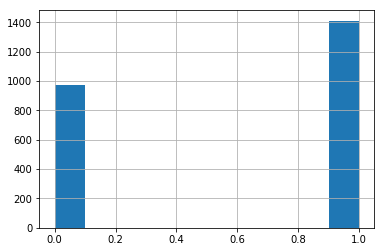

In [301]:
print(sent.Sentiment.value_counts())
sent.Sentiment.hist(); 

In [302]:
#Apply length function to the review column
lengths = sent.Post.apply(len)

print('Average character length of the posts are:')
print (np.mean(lengths))

Average character length of the posts are:
240.93616127677447


# NLP

In [303]:
import nltk
#nltk.download()

In [304]:
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

eng = stopwords.words('English')

In [305]:
test_post = sent['Post'][0]# the review used for initial analysis
print(test_post)

 #bear or #Bulls ??? #bitcoinATM #miners #btc #eth #ltc #BTG #Ethereum #cryptocurrency #btc #bitcointrade #mining #blockchain #Crypto #ltc #BitcoinGold #BitcoinCash #nanobank #ToTheMoon #trade #cryptoexchange #hold #HODL #altcoin #dash #bitcoinprice #bitofhumor #segwit2x 


In [281]:
print(len(sent_tokenize(test_post)))
sent_tokenize(test_post) # doesn't really split all sentences

4


[' $BTC We hit short term resistance today and are now hitting the upper breakout trend line, the daily and hourly chart are signaling a potential short term reversal so i would look to sell short term breakouts unless we get a nice reversal back above $10800 .',
 'If you like my analysis and it helps a tip would be appreciated.',
 'Cheers!',
 '$ETC $ETH $LTC']

In [282]:
# Check if it does a better job if we add space after every period
test_post = test_post.replace('.','. ')

print(len(sent_tokenize(test_post)), end='\n\n') # number of sentences

# print all sentences on a new line
for sent in sent_tokenize(test_post):
    print(sent, end='\n\n')

4

 $BTC We hit short term resistance today and are now hitting the upper breakout trend line, the daily and hourly chart are signaling a potential short term reversal so i would look to sell short term breakouts unless we get a nice reversal back above $10800 .

If you like my analysis and it helps a tip would be appreciated.

Cheers!

$ETC $ETH $LTC



In [306]:
test_post = re.sub('[^a-zA-Z]',' ',test_post)
print(test_post) # remove special character

  bear or  Bulls      bitcoinATM  miners  btc  eth  ltc  BTG  Ethereum  cryptocurrency  btc  bitcointrade  mining  blockchain  Crypto  ltc  BitcoinGold  BitcoinCash  nanobank  ToTheMoon  trade  cryptoexchange  hold  HODL  altcoin  dash  bitcoinprice  bitofhumor  segwit x 


In [284]:
test_post = test_post.lower()

In [285]:
test_post

'  btc we hit short term resistance today and are now hitting the upper breakout trend line  the daily and hourly chart are signaling a potential short term reversal so i would look to sell short term breakouts unless we get a nice reversal back above           if you like my analysis and it helps a tip would be appreciated   cheers   etc  eth  ltc '

In [287]:
test_post_words = test_post.split()
print(test_post_words[:10]) # tokenize and lower case
print(len(test_post_words))

['btc', 'we', 'hit', 'short', 'term', 'resistance', 'today', 'and', 'are', 'now']
62


In [288]:
ps = PorterStemmer() #initialize Porter Stemmer object

ps_stems = []
for w in test_post_words:
    ps_stems.append(ps.stem(w))

print(' '.join(ps_stems)) # add all the stemmed words to one string

btc we hit short term resist today and are now hit the upper breakout trend line the daili and hourli chart are signal a potenti short term revers so i would look to sell short term breakout unless we get a nice revers back abov if you like my analysi and it help a tip would be appreci cheer etc eth ltc


In [293]:
#parts of speech tagging

token_tag = pos_tag(test_post_words)
token_tag[:10]

[('btc', 'NN'),
 ('we', 'PRP'),
 ('hit', 'VBD'),
 ('short', 'JJ'),
 ('term', 'NN'),
 ('resistance', 'NN'),
 ('today', 'NN'),
 ('and', 'CC'),
 ('are', 'VBP'),
 ('now', 'RB')]

In [294]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'

In [295]:
#from nltk.stem import WordNetLemmatizer


wnl = WordNetLemmatizer()

wnl_stems = []
for pair in token_tag:
    res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
    wnl_stems.append(res)

print(' '.join(wnl_stems))

btc we hit short term resistance today and be now hit the upper breakout trend line the daily and hourly chart be signal a potential short term reversal so i would look to sell short term breakout unless we get a nice reversal back above if you like my analysis and it help a tip would be appreciate cheer etc eth ltc


In [313]:
def post_cleaner(post):
    
    #1. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', post)
    
    #2. Remove punctuation
    post = re.sub("[^a-zA-Z]", " ",post)
    
    #3. Tokenize into words (all lower case)
    post = post.lower().split()
    
    #4. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    post = [w for w in post if not w in eng_stopwords]
    
    #5. Join the review to one sentence
    post = ' '.join(post+emoticons)
    # add emoticons to the end

    return(post)

In [326]:
%%time

num_posts = len(sent['Post'])

post_clean_original = []

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    post_clean_original.append(post_cleaner(record['Post'][i]))

Done with 500 posts
Done with 1000 posts
Done with 1500 posts
Done with 2000 posts
CPU times: user 448 ms, sys: 58.4 ms, total: 506 ms
Wall time: 506 ms


In [331]:
%%time
# Lemmatizer

post_clean_wnl = []

wnl = WordNetLemmatizer()

for i in range(0,num_posts):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d posts" %(i+1)) 
    
    wnl_stems = []
    token_tag = pos_tag(post_clean_original[i].split())
    for pair in token_tag:
        res = wnl.lemmatize(pair[0],pos=get_wordnet_pos(pair[1]))
        wnl_stems.append(res)

    post_clean_wnl.append(' '.join(wnl_stems))

Done with 500 posts
Done with 1000 posts
Done with 1500 posts
Done with 2000 posts
CPU times: user 4.04 s, sys: 169 ms, total: 4.21 s
Wall time: 4.22 s


In [333]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

# put everything together in a function

def predict_sentiment(cleaned_posts, y=sent["Sentiment"]):

    print("Creating the bag of words model..\n")
    # CountVectorizer" is scikit-learn's bag of words tool, here we show more keywords 
    vectorizer = CountVectorizer(analyzer = "word",   \
                                 tokenizer = None,    \
                                 preprocessor = None, \
                                 stop_words = None,   \
                                 max_features = 2000) 
    
    X_train, X_test, y_train, y_test = train_test_split(\
    cleaned_posts, y, random_state=0, test_size=0.2)

    # Then we use fit_transform() to fit the model / learn the vocabulary,
    # then transform the data into feature vectors.
    # The input should be a list of strings. .toarraty() converts to a numpy array
    
    train_bag = vectorizer.fit_transform(X_train).toarray()
    test_bag = vectorizer.transform(X_test).toarray()

    # You can extract the vocabulary created by CountVectorizer
    # by running print(vectorizer.get_feature_names())


    print("Training the random forest classifier..\n")
    # Initialize a Random Forest classifier with 75 trees
    forest = RandomForestClassifier(n_estimators = 50) 

    # Fit the forest to the training set, using the bag of words as 
    # features and the sentiment labels as the target variable
    forest = forest.fit(train_bag, y_train)


    train_predictions = forest.predict(train_bag)
    test_predictions = forest.predict(test_bag)
    
    train_acc = metrics.accuracy_score(y_train, train_predictions)
    valid_acc = metrics.accuracy_score(y_test, test_predictions)
    print("The training accuracy is: ", train_acc, "\n", "The validation accuracy is: ", valid_acc)
    print()
    print()
    #Extract feature importnace
    print('TOP TEN IMPORTANT FEATURES:')
    importances = forest.feature_importances_
    indices = np.argsort(importances)[::-1]
    top_10 = indices[:10]
    print([vectorizer.get_feature_names()[ind] for ind in top_10])

In [335]:
predict_sentiment(post_clean_original) #Accuracy measure with original sentences

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.983718487395 
 The validation accuracy is:  0.607966457023


TOP TEN IMPORTANT FEATURES:
['bitcoin', 'btc', 'cryptocurrency', 'investfeed', 'support', 'eth', 'crypto', 'ift', 'http', 'cryptocurrencies']


In [336]:
predict_sentiment(post_clean_wnl) #Lemmatized sentences lead to lower accuracy

Creating the bag of words model..

Training the random forest classifier..

The training accuracy is:  0.984243697479 
 The validation accuracy is:  0.574423480084


TOP TEN IMPORTANT FEATURES:
['bitcoin', 'cryptocurrency', 'btc', 'investfeed', 'support', 'eth', 'cryptocurrencies', 'crypto', 'http', 'ift']
